In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [274]:
df=pd.read_csv("car_prices.csv")

In [275]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [276]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [277]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [278]:
df['year'] = df['year'].fillna(df['year'].mean())
df['condition'] = df['condition'].fillna(df['condition'].mean())
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['mmr'] = df['mmr'].fillna(df['mmr'].mean())
df['sellingprice'] = df['sellingprice'].fillna(df['sellingprice'].mean())

In [279]:
df.isnull().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition           0
odometer            0
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate           12
dtype: int64

In [280]:
object_columns = df.select_dtypes(include=['object']).columns
df[object_columns] = df[object_columns].fillna('Unknown')

In [281]:
df.isnull().sum()

year            0
make            0
model           0
trim            0
body            0
transmission    0
vin             0
state           0
condition       0
odometer        0
color           0
interior        0
seller          0
mmr             0
sellingprice    0
saledate        0
dtype: int64

In [282]:
df.drop(columns=['vin','saledate'], inplace=True)

In [283]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0
1,2015,Kia,Sorento,LX,SUV,automatic,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0
3,2015,Volvo,S60,T5,Sedan,automatic,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0


In [284]:
categorical_columns = ['make', 'model', 'trim', 'body', 'transmission', 'state', 'color', 'interior', 'seller']
le = LabelEncoder()
for column in categorical_columns:
    df[column] = le.fit_transform(df[column])

In [285]:
df.head()

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2015,24,658,998,36,2,29,5.0,16639.0,44,2,7202,20500.0,21500.0
1,2015,24,658,998,36,2,29,5.0,9393.0,44,1,7202,20800.0,21500.0
2,2014,3,9,283,37,2,29,45.0,1331.0,34,2,4978,31900.0,30000.0
3,2015,52,596,1399,37,2,29,41.0,14282.0,44,2,13795,27500.0,27750.0
4,2014,3,42,498,37,2,29,43.0,2641.0,34,2,4978,66000.0,67000.0


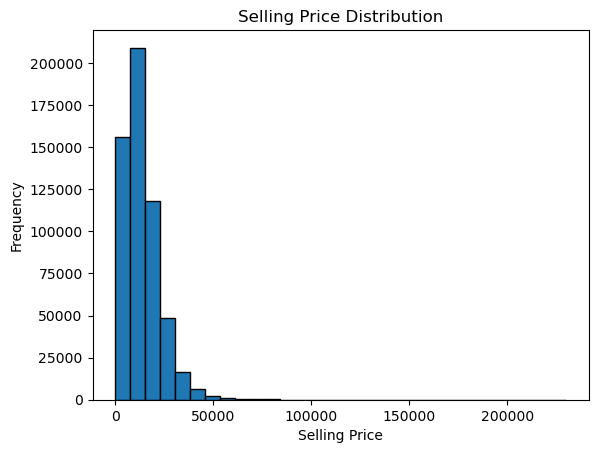

In [286]:
plt.hist(df['sellingprice'], bins=30, edgecolor='black')
plt.title('Selling Price Distribution')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.show()

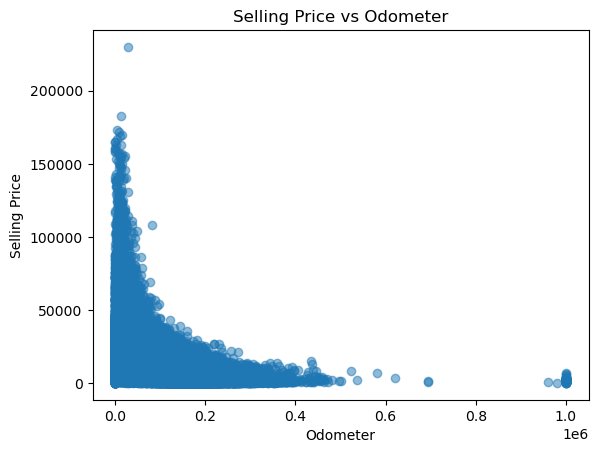

In [287]:
plt.scatter(df['odometer'], df['sellingprice'], alpha=0.5)
plt.title('Selling Price vs Odometer')
plt.xlabel('Odometer')
plt.ylabel('Selling Price')
plt.show()

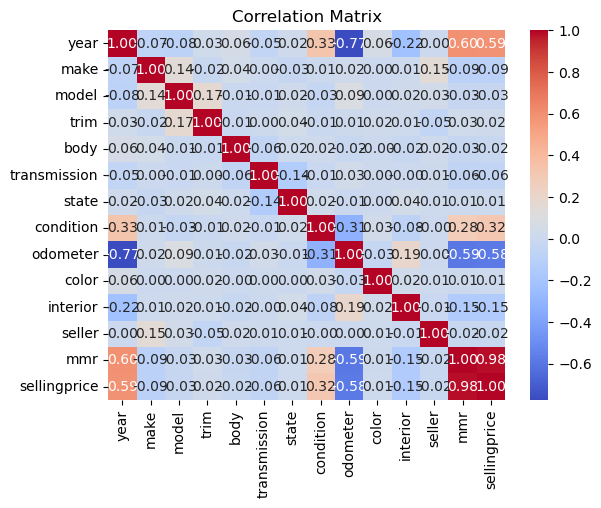

In [288]:
correlation_matrix = df.corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

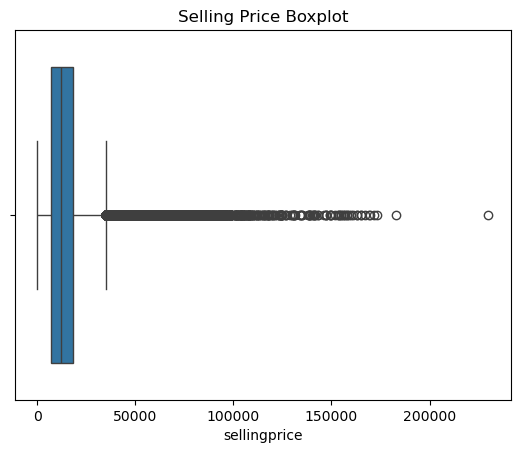

In [289]:
sns.boxplot(x=df['sellingprice'])
plt.title('Selling Price Boxplot')
plt.show()